# Wrangle and Analyze WeRateDogs Twitter Data

## Introduction

In this Project, using Python and its libraries,data is gathered from a variety of sources and in a variety of formats and data wrangling is performed. After data wrangling efforts and related documenting in a Jupyter Notebook, Data is analysed and visualizations are created using Python (and its libraries) and/or SQL.

WeRateDogs Twitter [@dog_rates](https://twitter.com/dog_rates) data is used to wrangle and create interesting and trustworthy analyses and visualizations. To know more about WeRateDogs you can visit [here](https://en.wikipedia.org/wiki/WeRateDogs)

Following tasks are done as part of this project :

* Data wrangling, which consists of :
 * Gathering data
 * Assessing data
 * Cleaning data
* Storing, analyzing, and visualizing wrangled data
* Reporting on 1) data wrangling efforts and 2) data analyses and visualizations


To get started, let's import libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import os
import warnings
import matplotlib.dates as mdates


%matplotlib inline

## Gathering data 

In this project we're going to gather below 3 different datasets using 3 different ways 

#### 1. The WeRateDogs Twitter archive Downloaded manually : [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv). 

This file contains basic info about tweets like tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator etc

In [2]:
# Loading twitter_archive_enhanced.csv file 
archive_data = pd.read_csv('twitter-archive-enhanced.csv')
archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. [image_predictions.tsv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) is downloaded programmatically using the Requests library of python.

This file contains data about tweet image predictions.

In [5]:
#Download image_predictions.tsv file using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response_obj = requests.get(url) 

# raise for any exceptions  
response_obj.raise_for_status() 

# Write response object to image-predictions.tsv file
with open('image-predictions.tsv', 'wb') as file:
        file.write(response_obj.content)

# Load image-predictions.tsv file
image_data = pd.read_csv('image-predictions.tsv',sep='\t')
image_data.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Additional tweet information using Twitter API

Last dataset is downloaded using the tweet IDs in the WeRateDogs Twitter archive and querying the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 

Each tweet's JSON data is written to its own line in tweet_json.txt. After that, tweet_json.txt file is read line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

For querying the Twitter API , twitter developer account is required and tokens need to be downloaded to access API.

Note: Twitter API keys, secrets, and tokens used are not included in this project

In [6]:
# create variables to store twitter API keys and tokens
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [7]:
# Connection to API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
# get tweet json info from API and store it to tweet_json.txt 
 if not os.path.exists('tweet_json.txt'):
    with open('tweet_json.txt', 'wb') as file:
        for tweet_id in archive_info['tweet_id']:
            try:
                tweet_json = api.get_status(tweet_id, tweet_mode='extended')._json
                json.dump(tweet_json, file)
                file.write('\n')
            except:
                continue   


In [9]:
# load data from tweet_json.txt to data frame
json_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            json_data.append(tweet)
        except:
            continue
            
api_data = pd.DataFrame(json_data)
api_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38395,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8431,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32886,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6213,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24788,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4113,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41726,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8561,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39899,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9287,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
# save converted df to csv file
api_data.to_csv('tweet_json.csv', encoding = 'utf-8', index=False)

## Data Wrangling

In this section data is read from all 3 datasets and necessary changes are made to tidy and unify data

In [11]:
# print column names in api_info
api_data.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [12]:
# twitter archive data
archive_data.info()
archive_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
archive_data['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
archive_data['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
archive_data['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
archive_data['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

* Total no of rows in 2356 
* in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id  & retweeted_status_user_id  are of type float64 instead of int64 or Object
* timestamp & retweeted_status_timestamp are of type object instead of Date
* expanded_urls has some null values. only 2297 are non-null.
* There are some null values in the data set
* There are some retweeted data, since we're calculating only for original tweets, need to remove them as well as columns related to retweets
* combine doggo,floofer,pupper,puppo to single column because altogether there are presnet only for 394 rows

In [17]:
# check duplicates for tweet id in archive data set
archive_data.duplicated('tweet_id', keep=False).value_counts()

False    2356
dtype: int64

* No duplicate tweet id's

In [18]:
# check rating numerator
archive_data['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
# check rating denominator
archive_data['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

* we have different ranges and counts for numerator & denominator
* need to remove denominator with 0

In [20]:
# image predictions data
image_data.info()
image_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


* Number of rows in image predictions is 2074 whereas in archive it's 2356
* Some tweets in archive maybe missing from image prediction dataset

In [21]:
# check duplicates for tweet id in image prediction data set
image_data.duplicated('tweet_id', keep=False).value_counts()

False    2075
dtype: int64

* There are no duplicate tweet id's

In [22]:
# check duplicates for image url's in image prediction dataset
image_data.duplicated('jpg_url', keep=False).value_counts()

False    1943
True      132
dtype: int64

* There are duplicate image url's in image_data 

In [23]:
# check p1_dog value counts
image_data['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [24]:
# check p2_dog value counts
image_data['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [25]:
# check p3_dog value counts
image_data['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [26]:
# api data
api_data.info()
api_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2340 non-null object
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2066 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null object
id                               2340 non-null int64
id_str                           2340 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38395,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8431,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32886,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6213,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24788,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4113,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41726,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8561,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39899,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9287,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


* In API dataset we have only 2340 rows
* 'id' column should be renamed to 'tweet_id' so that it can be merged with other data sets.

In [27]:
# check duplicates for id's in api dataset
api_data.duplicated('id', keep=False).value_counts()

False    2340
dtype: int64

## Clean data

#### quality issues 
Archive Data:
* Remove retweets in th dataset because we're looking only for original tweets
* Same goes for response tweets as well, as they are not considered for rating
* convert timestamp is of data type object instead of Date. This needs to be formatted.
* expanded_urls has some null values. only 2297 are non-null.
* merge columns related to dog prediction and confidence level for easy readability.
* remove columns in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id  & retweeted_status_user_id in archive_data(Twitter Archive dataset)
* Remove any other columns which are not signifficant for analysis
* Making columns names more readable

Image Prediction Data:
* remove rows with duplicate jpg_url value

API Data:
* rename column 'id' to 'tweet_id' in api_data(Twitter API dataset)
* api_data has 2340 rows compared to archive_data(2356) and image_data(2075), make data uniform across all datasets using tweet_id as key
* change tweet_id data type to string, as no numerical calculations are going to be performed on it

#### tidiness issues
* combine doggo,floofer,pupper,puppo columns to single column because altogether there are present only for 394 rows
* remove image_num column from image_data(Image Prediction dataset)
* Merge archive_data,image_data & api_data

In [28]:
# make copies of existing 3 data sets
archive_data_clean = archive_data.copy()
image_data_clean = image_data.copy()
api_data_clean = api_data.copy()

#### Define

Remove unnecessary columns in Twitter API data set

In [29]:
api_data_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

#### Code

In [30]:
# remove unnecessary columns from api data
api_data_clean = api_data_clean[['id', 'favorite_count','retweet_count']]

#### Test

In [31]:
api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


#### Define

Rename id to tweet_id in Twitter API dataset

In [32]:
api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


#### Code

In [33]:
api_data_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [34]:
api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


#### Define

merge twitter archive data , image prediction data and data from Twitter API

#### Code

In [35]:
# merge archive data set to api data set using tweet_id & id of respective datasets
archive_data_clean = pd.merge(archive_data_clean, api_data_clean,on='tweet_id', how='inner')
# merge archive data set and image perdiction state using common column tweet_id
archive_data_clean = pd.merge(archive_data_clean, image_data_clean,on='tweet_id', how='inner')

#### Test

In [36]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 30 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
favorite_count                2066 

####  Define
combine doggo,floofer,pupper,puppo columns in archive_data to single column dog_stage

In [37]:
archive_data_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

#### Code

In [38]:
# merge columns doggo,floofer,pupper,puppo
archive_data_clean['dog_type'] = archive_data_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
archive_data_clean['dog_type'].replace("NoneNoneNoneNone","None ", inplace=True)
archive_data_clean['dog_type'].replace("doggoNoneNoneNone","doggo", inplace=True)
archive_data_clean['dog_type'].replace("NoneflooferNoneNone","floofer", inplace=True)
archive_data_clean['dog_type'].replace("NoneNonepupperNone","pupper", inplace=True)
archive_data_clean['dog_type'].replace("NoneNoneNonepuppo","puppo", inplace=True)
# remove columns
archive_data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
# remove duplicates 
archive_data_clean = archive_data_clean.sort_values('dog_type').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [39]:
# check columns
archive_data_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type'],
      dtype='object')

In [40]:
# check value count for dog_type
archive_data_clean['dog_type'].value_counts()

None                    1746
pupper                   210
doggo                     67
puppo                     23
doggoNonepupperNone       11
floofer                    7
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_type, dtype: int64

#### Define
Remove retweets in the dataset by checking for field retweeted_status_id

#### Code

In [41]:
# remove rows with retweets
archive_data_clean = archive_data_clean[pd.isnull(archive_data_clean['retweeted_status_id'])]

#### Test

In [42]:
# check retweeted_status_user_id value count
archive_data_clean['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

#### Define
remove tweets with no images based on field jpg_url

In [43]:
archive_data_clean.duplicated('jpg_url', keep=False).value_counts()

False    1992
dtype: int64

#### Code

In [44]:
# remove tweets with no images
archive_data_clean = archive_data_clean.dropna(subset = ['jpg_url'])


#### Test

In [45]:
archive_data_clean.duplicated('jpg_url', keep=False).value_counts()

False    1992
dtype: int64

#### Define

remove columns related to retweets

In [46]:
archive_data_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type'],
      dtype='object')

#### Code

In [47]:
archive_data_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [48]:
archive_data_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type'],
      dtype='object')

####  Define
Removing reply tweets using column in_reply_to_status_id

In [49]:
archive_data_clean['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.558181e+17    1
6.753494e+17    1
6.747934e+17    1
6.747522e+17    1
7.468859e+17    1
6.706684e+17    1
6.844811e+17    1
6.749998e+17    1
6.842229e+17    1
7.291135e+17    1
6.754971e+17    1
6.717299e+17    1
6.715610e+17    1
7.030419e+17    1
6.757073e+17    1
7.590995e+17    1
6.914169e+17    1
7.032559e+17    1
6.678065e+17    1
6.920419e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, dtype: int64

#### Code

In [50]:
# remove rows with responses
archive_data_clean = archive_data_clean[pd.isnull(archive_data_clean['in_reply_to_status_id'])]


#### Test

In [51]:
archive_data_clean['in_reply_to_status_id'].value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

#### Define
Remove columns in_reply_to_status_id,in_reply_to_user_id,expanded_urls,id,img_num

In [52]:
archive_data_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type'],
      dtype='object')

#### Code

In [53]:
archive_data_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls', 'img_num'], axis=1, inplace=True)

#### Test

In [54]:
archive_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'dog_type'],
      dtype='object')

#### Define
Convert timestamp to datetime object 

In [55]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 444
Data columns (total 20 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null object
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
jpg_url               1969 non-null object
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null bool
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null bool
p3                    1969 non-null object
p3_conf               1969 non-null float64
p3_dog                1969 non-null bool
dog_type              1969 non-null object
dtypes: bool(3), float64(3), int64(5), obj

#### Code

In [56]:
archive_data_clean['timestamp'] = pd.to_datetime(archive_data_clean['timestamp'])

#### Test

In [57]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 444
Data columns (total 20 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null datetime64[ns]
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
jpg_url               1969 non-null object
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null bool
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null bool
p3                    1969 non-null object
p3_conf               1969 non-null float64
p3_dog                1969 non-null bool
dog_type              1969 non-null object
dtypes: bool(3), datetime64[ns](1)

#### Define
Convert rating numerator and denominator to float

In [58]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 444
Data columns (total 20 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null datetime64[ns]
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null int64
rating_denominator    1969 non-null int64
name                  1969 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
jpg_url               1969 non-null object
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null bool
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null bool
p3                    1969 non-null object
p3_conf               1969 non-null float64
p3_dog                1969 non-null bool
dog_type              1969 non-null object
dtypes: bool(3), datetime64[ns](1)

#### Code

In [59]:
archive_data_clean[['rating_numerator', 'rating_denominator']] = archive_data_clean[['rating_numerator','rating_denominator']].astype(float)


#### Test

In [60]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 444
Data columns (total 20 columns):
tweet_id              1969 non-null int64
timestamp             1969 non-null datetime64[ns]
source                1969 non-null object
text                  1969 non-null object
rating_numerator      1969 non-null float64
rating_denominator    1969 non-null float64
name                  1969 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
jpg_url               1969 non-null object
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null bool
p2                    1969 non-null object
p2_conf               1969 non-null float64
p2_dog                1969 non-null bool
p3                    1969 non-null object
p3_conf               1969 non-null float64
p3_dog                1969 non-null bool
dog_type              1969 non-null object
dtypes: bool(3), datetime64[ns

#### Define
Create single columns for predicted_dog and confidence_level based on predictability and level of confidence

In [61]:
archive_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'dog_type'],
      dtype='object')

#### Code

In [62]:
# select algorithm based on it's true prediction and level of confidence
prediction_algorithm = []
confidence_level = []

def get_prediction_confidence(dataframe):
    
    if ( dataframe['p1_dog'] == True and dataframe['p2_dog'] == True and dataframe['p3_dog'] == True ) :
        if ( dataframe['p1_conf'] > dataframe['p2_conf'] and dataframe['p1_conf'] > dataframe['p3_conf']  ) :
            prediction_algorithm.append(dataframe['p1'])
            confidence_level.append(dataframe['p1_conf'])
        elif ( dataframe['p2_conf'] > dataframe['p1_conf'] and dataframe['p2_conf'] > dataframe['p3_conf']  ) :
            prediction_algorithm.append(dataframe['p2'])
            confidence_level.append(dataframe['p2_conf'])
        elif ( dataframe['p3_conf'] > dataframe['p1_conf'] and dataframe['p3_conf'] > dataframe['p2_conf']  ) :
            prediction_algorithm.append(dataframe['p3'])
            confidence_level.append(dataframe['p3_conf'])
    elif ( dataframe['p1_dog'] == True and dataframe['p2_dog'] == True) :
        if ( dataframe['p1_conf'] > dataframe['p2_conf'] ) :
            prediction_algorithm.append(dataframe['p1'])
            confidence_level.append(dataframe['p1_conf'])
        else:
            prediction_algorithm.append(dataframe['p2'])
            confidence_level.append(dataframe['p2_conf'])
    elif ( dataframe['p2_dog'] == True and dataframe['p3_dog'] == True) :
        if ( dataframe['p2_conf'] > dataframe['p3_conf'] ) :
            prediction_algorithm.append(dataframe['p2'])
            confidence_level.append(dataframe['p2_conf'])
        else:
            prediction_algorithm.append(dataframe['p3'])
            confidence_level.append(dataframe['p3_conf'])
    elif ( dataframe['p3_dog'] == True and dataframe['p1_dog'] == True) :
        if ( dataframe['p3_conf'] > dataframe['p1_conf'] ) :
            prediction_algorithm.append(dataframe['p3'])
            confidence_level.append(dataframe['p3_conf'])
        else:
            prediction_algorithm.append(dataframe['p1'])
            confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction_algorithm.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction_algorithm.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    elif dataframe['p1_dog'] == True:
        prediction_algorithm.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction_algorithm.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction_algorithm.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        prediction_algorithm.append('NaN')
        confidence_level.append(0)

archive_data_clean.apply(get_prediction_confidence, axis=1)
archive_data_clean['prediction_algorithm'] = prediction_algorithm
archive_data_clean['confidence_level'] = confidence_level

#### Test

In [63]:
archive_data_clean['prediction_algorithm'].value_counts()

NaN                            304
golden_retriever               156
Labrador_retriever             106
Pembroke                        94
Chihuahua                       90
pug                             62
toy_poodle                      50
chow                            48
Samoyed                         42
Pomeranian                      41
malamute                        33
Chesapeake_Bay_retriever        31
cocker_spaniel                  30
French_bulldog                  30
miniature_pinscher              24
Eskimo_dog                      22
German_shepherd                 21
Cardigan                        21
Siberian_husky                  20
Staffordshire_bullterrier       20
beagle                          20
Shih-Tzu                        20
Maltese_dog                     19
Shetland_sheepdog               18
Rottweiler                      18
Italian_greyhound               17
basset                          17
kuvasz                          17
Lakeland_terrier    

#### Define
Drop columns related to image prediction 

#### Code

In [64]:
archive_data_clean.drop(['p1' ,'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3' ,'p3_conf', 'p3_dog' ], axis=1, inplace=True)

#### Test

In [65]:
archive_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'dog_type', 'prediction_algorithm', 'confidence_level'],
      dtype='object')

#### Archive master cleaned data to File

In [66]:
archive_data_clean.to_csv('twitter_archive_master.csv', index = False)

## Analysis

Print sample from clean data set

In [67]:
archive_data_clean.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,prediction_algorithm,confidence_level
350,819227688460238848,2017-01-11 17:01:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's wondering if you come here ...,12.0,10.0,Finn,24787,7376,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,None,Border_terrier,0.482452
1207,696894894812565505,2016-02-09 03:14:25,"<a href=""http://twitter.com/download/iphone"" r...",These two pirates crashed their ship and don't...,9.0,10.0,None,2485,731,https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg,None,Appenzeller,0.665628
1133,703356393781329922,2016-02-26 23:10:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,9.0,10.0,Socks,2021,418,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,None,Border_collie,0.894842
599,779056095788752897,2016-09-22 20:33:42,"<a href=""http://twitter.com/download/iphone"" r...",Everybody drop what you're doing and look at t...,13.0,10.0,None,15943,4999,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,None,Chihuahua,0.721188
1882,669354382627049472,2015-11-25 03:18:15,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dug. Dug fucken loves peaches. 8/10 https...,8.0,10.0,Dug,2782,1320,https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg,None,Chihuahua,0.973990
923,730196704625098752,2016-05-11 00:43:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's camera shy. Tail longer ...,6.0,10.0,Charles,5153,2066,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,None,NaN,0.000000
1949,668142349051129856,2015-11-21 19:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This lil pup is Oliver. Hops around. Has wings...,2.0,10.0,None,576,296,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,None,NaN,0.000000
816,747885874273214464,2016-06-28 20:14:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,8.0,10.0,a,3135,1073,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,None,kuvasz,0.408450
2055,666063827256086533,2015-11-16 01:22:45,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,10.0,10.0,the,471,216,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,None,golden_retriever,0.775930
904,734912297295085568,2016-05-24 01:02:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He's a literal fluffball. Sneaky ...,10.0,10.0,Jax,2891,556,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,None,Maltese_dog,0.847292


#### Most Favorite tweet

In [68]:
archive_data_clean.sort_values('favorite_count', ascending=False)[['tweet_id','favorite_count']].head()

,tweet_id,favorite_count
845,744234799360020481,164884
325,822872901745569793,141718
111,866450705531457537,123015
880,739238157791694849,122315
428,807106840509214720,121609


In [69]:
# get row details for Most favorite tweet
pd.set_option('display.max_colwidth', -1)
archive_data_clean.loc[archive_data_clean['tweet_id'] == 744234799360020481]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,prediction_algorithm,confidence_level
845,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,10.0,None,164884,84502,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,doggo,Labrador_retriever,0.825333


#### Least favorite tweet

In [70]:
archive_data_clean.sort_values('favorite_count', ascending=True)[['tweet_id','favorite_count']].head()

,tweet_id,favorite_count
2049,666102155909144576,80
2047,666268910803644416,102
2030,666447344410484738,105
2037,666407126856765440,108
2061,666049248165822465,109


In [71]:
# get row details for least favorite tweet
pd.set_option('display.max_colwidth', -1)
archive_data_clean.loc[archive_data_clean['tweet_id'] == 666102155909144576]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,prediction_algorithm,confidence_level
2049,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,11.0,10.0,None,80,12,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,None,English_setter,0.298617


#### Highest retweeted tweet

In [72]:
archive_data_clean.sort_values('retweet_count', ascending=False)[['tweet_id','retweet_count']].head()

,tweet_id,retweet_count
845,744234799360020481,84502
880,739238157791694849,62719
428,807106840509214720,60166
325,822872901745569793,48315
59,879415818425184262,43881


In [73]:
# get row details for Highest retweeted tweet
pd.set_option('display.max_colwidth', -1)
archive_data_clean.loc[archive_data_clean['tweet_id'] == 744234799360020481]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,prediction_algorithm,confidence_level
845,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,10.0,None,164884,84502,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,doggo,Labrador_retriever,0.825333


#### Lowest retweeted tweet

In [74]:
archive_data_clean.sort_values('retweet_count', ascending=True)[['tweet_id','retweet_count']].head()

,tweet_id,retweet_count
2049,666102155909144576,12
2030,666447344410484738,20
1936,668291999406125056,32
2047,666268910803644416,35
2037,666407126856765440,40


In [75]:
# get row details for lowest retweeted tweet
pd.set_option('display.max_colwidth', -1)
archive_data_clean.loc[archive_data_clean['tweet_id'] == 666102155909144576]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,prediction_algorithm,confidence_level
2049,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,11.0,10.0,None,80,12,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,None,English_setter,0.298617


#### retweets vs favorites

Text(0.5,1,'Retweets and favorites Scatter plot')

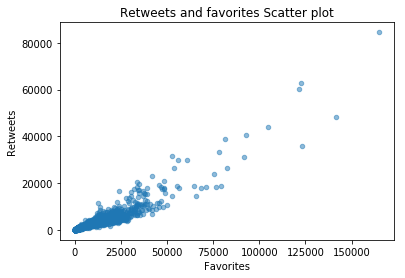

In [76]:
archive_data_clean.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

* There seems to be a positive association between retweet count and favorite count
* Only few tweets are present with more than 50,000 favorites and 20,000 Retweets


Plot Retweets & favorites over Time

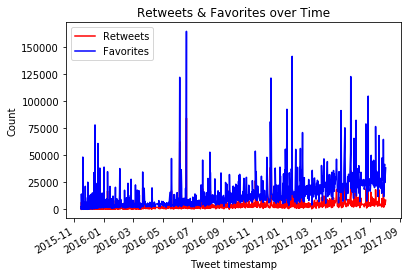

In [77]:
archive_data_clean.set_index('timestamp', inplace=True)

archive_data_clean['retweet_count'].plot(color = 'red', label='Retweets')
archive_data_clean['favorite_count'].plot(color = 'blue', label='Favorites')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets & Favorites over Time')
plt.savefig('retweets_favorites.png')
plt.show()

* Above plot is drawn using retweet_count , favorite_count from data gathered using twitter API.
* In this plot we can see that there are some high spike in retweets and favorites
* Favorites are always greater than retweets throughout the dataset

## Required Software

* Jupyter Notebook 
* The following packages (libraries) are required 
 * pandas
 * NumPy
 * requests
 * tweepy
 * json

## References

https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
